In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

noisy_test_images = test_images + np.random.normal(loc=0, scale=np.random.uniform(50, 100), size=test_images.shape)
noisy_train_images = train_images + np.random.normal(loc=0, scale=np.random.uniform(10, 50), size=train_images.shape)

test_images = noisy_test_images.reshape((10000, 28, 28, 1))
train_images = noisy_train_images.reshape((60000,28,28,1))

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply augmentation to the training data for both original and noisy images
augmented_train_images = np.expand_dims(train_images, axis=-1)
augmented_noisy_train_images = np.expand_dims(train_images, axis=-1)

# datagen.fit(augmented_train_images)
# datagen.fit(augmented_noisy_train_images)


# Clip pixel values to the valid range [0, 255]
train_images = np.clip(train_images, 0, 255)
test_images = np.clip(noisy_test_images, 0, 255)


# No normalization step

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




11490434/11490434 [==============================] - 0s 0us/step


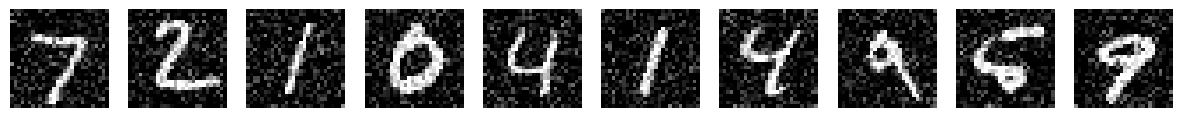

In [ ]:
plt.figure(figsize=(15, 1.5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.axis('off')

plt.show()

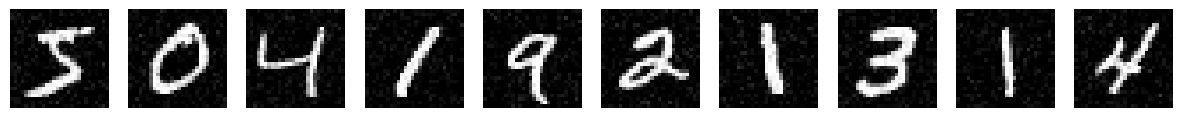

In [ ]:
plt.figure(figsize=(15, 1.5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
EPOCHS = 30

In [ ]:
!pip install psutil


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import psutil
from datetime import datetime

# Lists to store accuracy and resource usage values during training
custom_history = {'accuracy': [0], 'val_accuracy': [0]}
custom_cpu_usage = [0]
custom_memory_usage = [0]

# Function to log CPU and memory usage
def custom_log_resource_usage():
    cpu_percent = psutil.cpu_percent()
    memory_percent = psutil.virtual_memory().percent
    custom_cpu_usage.append(cpu_percent)
    custom_memory_usage.append(memory_percent)

# Training loop
for epoch in range(EPOCHS):
    result = model.fit(train_images, train_labels, batch_size=64, epochs=1, validation_data=(test_images, test_labels))

    test_loss, test_acc = model.evaluate(test_images, test_labels)

    print(f"Epoch {epoch + 1} - Test accuracy: {test_acc * 100:.2f}%")

    custom_log_resource_usage()

    custom_history['accuracy'].append(result.history['accuracy'][0])
    custom_history['val_accuracy'].append(result.history['val_accuracy'][0])



313/313 [==============================] - 1s 4ms/step - loss: 0.1130 - accuracy: 0.9704
Epoch 1 - Test accuracy: 97.04%
313/313 [==============================] - 1s 4ms/step - loss: 0.0825 - accuracy: 0.9767
Epoch 2 - Test accuracy: 97.67%
313/313 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9770
Epoch 3 - Test accuracy: 97.70%
313/313 [==============================] - 1s 3ms/step - loss: 0.1482 - accuracy: 0.9632
Epoch 4 - Test accuracy: 96.32%
313/313 [==============================] - 1s 3ms/step - loss: 0.1025 - accuracy: 0.9729
Epoch 5 - Test accuracy: 97.29%
313/313 [==============================] - 1s 3ms/step - loss: 0.1041 - accuracy: 0.9753
Epoch 6 - Test accuracy: 97.53%
313/313 [==============================] - 1s 3ms/step - loss: 0.1145 - accuracy: 0.9703
Epoch 7 - Test accuracy: 97.03%
313/313 [==============================] - 1s 3ms/step - loss: 0.1192 - accuracy: 0.9700
Epoch 8 - Test accuracy: 97.00%
313/313 [=======================

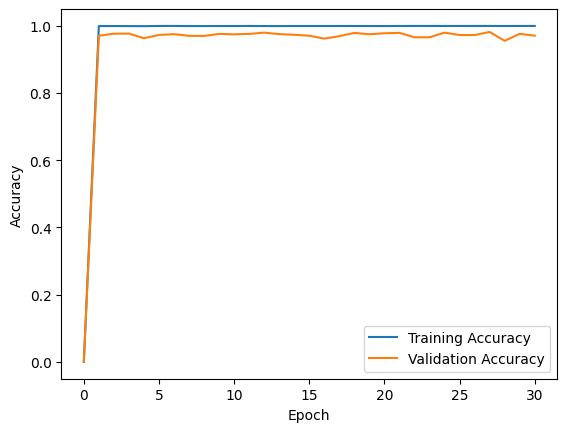

In [ ]:

# Plotting the accuracy over epochs
epochs_list_custom = range(0, EPOCHS + 1)

plt.plot(epochs_list_custom, custom_history['accuracy'], label='Training Accuracy')
plt.plot(epochs_list_custom, custom_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



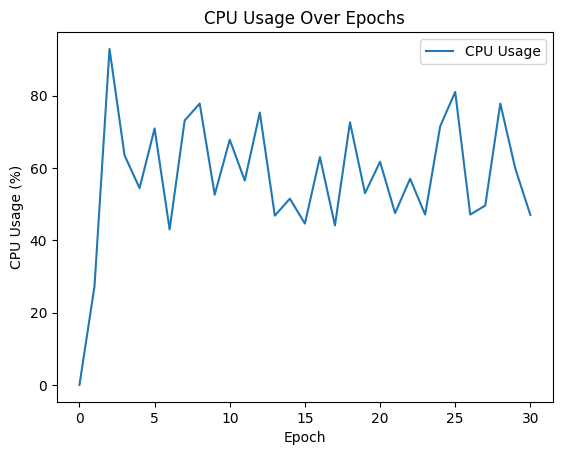

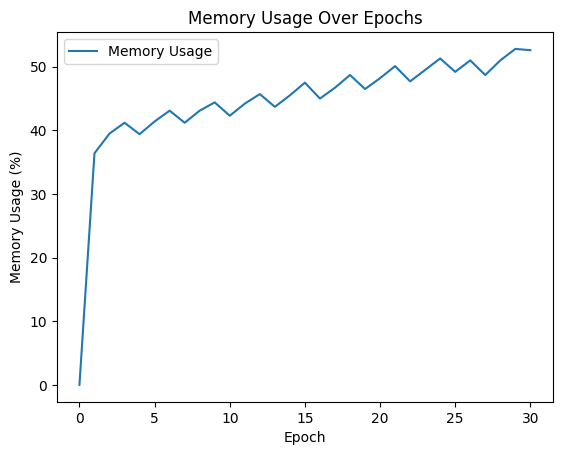

In [ ]:
# CNN

# Plotting CPU and memory usage over epochs
plt.plot(epochs_list_custom, custom_cpu_usage, label='CPU Usage')
plt.xlabel('Epoch')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.title('CPU Usage Over Epochs')
plt.show()

plt.plot(epochs_list_custom, custom_memory_usage, label='Memory Usage')
plt.xlabel('Epoch')
plt.ylabel('Memory Usage (%)')
plt.legend()
plt.title('Memory Usage Over Epochs')
plt.show()


In [ ]:
!pip install larq
import tensorflow as tf
import larq as lq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Normalize pixel values to be between -1 and 1
train_images, test_images = train_images / 126.5 - 1, test_images / 126.5 - 1

In [ ]:
# All quantized layers except the first will use the same options
kwargs = dict(input_quantizer="ste_sign",
              kernel_quantizer="ste_sign",
              kernel_constraint="weight_clip")

model = tf.keras.models.Sequential()

# In the first layer we only quantize the weights and not the input
model.add(lq.layers.QuantConv2D(32, (3, 3),
                                kernel_quantizer="ste_sign",
                                kernel_constraint="weight_clip",
                                use_bias=False,
                                input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(scale=False))

model.add(lq.layers.QuantConv2D(64, (3, 3), use_bias=False, **kwargs))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization(scale=False))

model.add(lq.layers.QuantConv2D(64, (3, 3), use_bias=False, **kwargs))
model.add(tf.keras.layers.BatchNormalization(scale=False))
model.add(tf.keras.layers.Flatten())

model.add(lq.layers.QuantDense(64, use_bias=False, **kwargs))
model.add(tf.keras.layers.BatchNormalization(scale=False))
model.add(lq.layers.QuantDense(10, use_bias=False, **kwargs))
model.add(tf.keras.layers.BatchNormalization(scale=False))
model.add(tf.keras.layers.Activation("softmax"))

In [ ]:
lq.models.summary(model)

In [ ]:
import tensorflow as tf
from datetime import datetime
import psutil
import matplotlib.pyplot as plt

# Lists to store accuracy and resource usage values during training
training_accuracy = [0]
validation_accuracy = [0]
cpu_usage = [0]
memory_usage = [0]

# Function to log CPU and memory usage
def log_resource_usage(epoch, logs):
    cpu_percent = psutil.cpu_percent()
    memory_percent = psutil.virtual_memory().percent
    current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"[{current_time}] CPU Usage: {cpu_percent}%, Memory Usage: {memory_percent}%")
    cpu_usage.append(cpu_percent)
    memory_usage.append(memory_percent)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training loop
for epoch in range(EPOCHS):
    # Training
    result = model.fit(train_images, train_labels, batch_size=64, epochs=1, validation_data=(test_images, test_labels),
                       callbacks=[tf.keras.callbacks.LambdaCallback(on_epoch_end=log_resource_usage)])

    # Store accuracy values
    training_accuracy.append(result.history['accuracy'][0])
    validation_accuracy.append(result.history['val_accuracy'][0])




938/938 [==============================] - 6s 7ms/step - loss: 0.4104 - accuracy: 0.9828 - val_loss: 0.4219 - val_accuracy: 0.9776


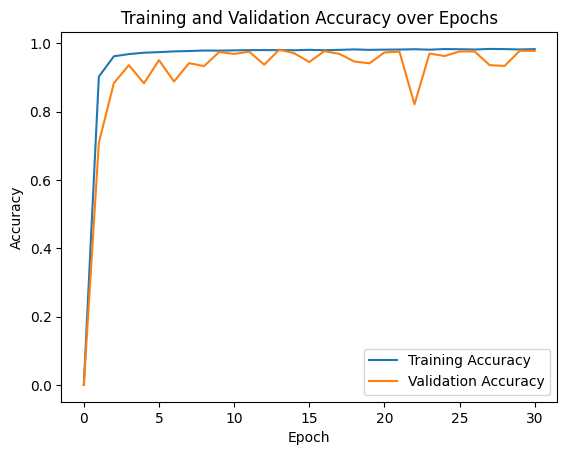

313/313 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.9776
Test accuracy 97.76%


In [ ]:
# Plotting the accuracy over epochs
epochs_list = range(0, EPOCHS + 1)

plt.plot(epochs_list, training_accuracy, label='Training Accuracy')
plt.plot(epochs_list, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy {test_acc * 100:.2f}%")

In [ ]:
print(f"Test accuracy {test_acc * 100:.2f} %")

Test accuracy 97.76 %


**COMPARISION**

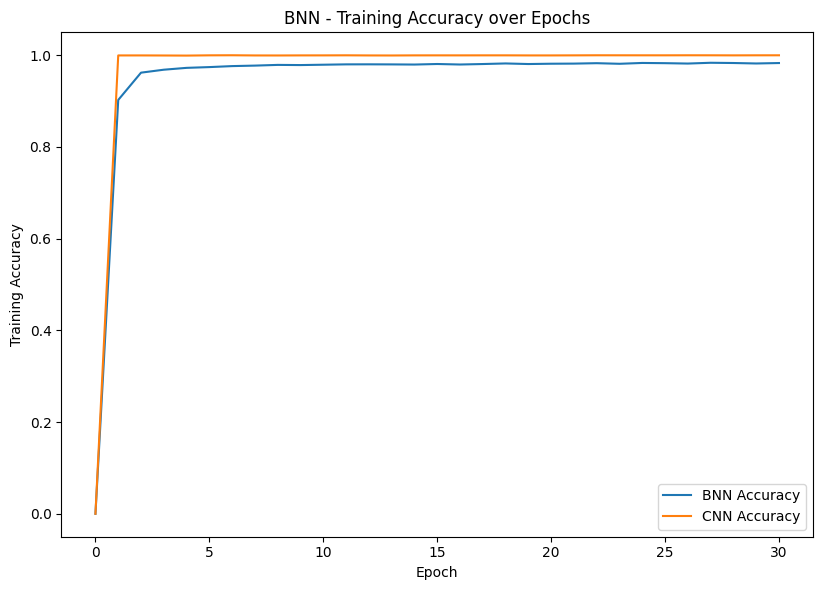

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_list, training_accuracy, label='BNN Accuracy')
plt.plot(epochs_list_custom, custom_history['accuracy'], label='CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('BNN - Training Accuracy over Epochs')
plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(epochs_list, custom_history['accuracy'], label='CNN Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Training Accuracy')
# plt.title('CNN - Training Accuracy over Epochs')
# plt.legend()

plt.tight_layout()
plt.show()


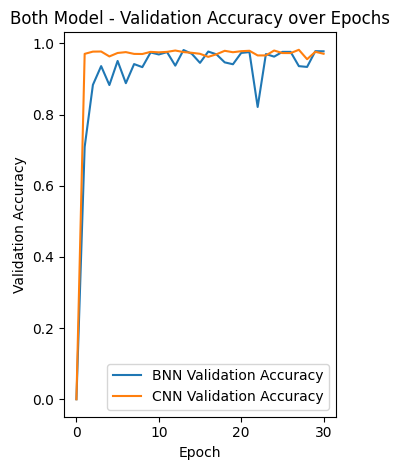

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy for the Binary NN model
plt.subplot(1, 2, 1)
plt.plot(epochs_list, validation_accuracy, label='BNN Validation Accuracy')
plt.plot(epochs_list_custom, custom_history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Both Model - Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

##**COMPARE USAGE ANALYTICS**

In [ ]:
# # Plotting CPU and memory usage over epochs
# epochs_list = range(1, EPOCHS + 1)
# plt.plot(epochs_list, cpu_usage, label='CPU Usage')
# plt.plot(epochs_list, memory_usage, label='Memory Usage')
# plt.xlabel('Epoch')
# plt.ylabel('Usage (%)')
# plt.legend()
# plt.show()


In [ ]:
# # BNN

# # Plotting CPU and memory usage over epochs
# plt.plot(epochs_list, cpu_usage, label='CPU Usage')
# plt.xlabel('Epoch')
# plt.ylabel('CPU Usage (%)')
# plt.legend()
# plt.title('CPU Usage Over Epochs')
# plt.show()

# plt.plot(epochs_list, memory_usage, label='Memory Usage')
# plt.xlabel('Epoch')
# plt.ylabel('Memory Usage (%)')
# plt.legend()
# plt.title('Memory Usage Over Epochs')
# plt.show()


In [ ]:
# Original CNN stats

In [ ]:
# # Plotting CPU and memory usage over epochs
# plt.plot(epochs_list_custom, custom_cpu_usage, label='CPU Usage')
# plt.xlabel('Epoch')
# plt.ylabel('CPU Usage (%)')
# plt.legend()
# plt.title('Custom CPU Usage Over Epochs')
# plt.show()

# plt.plot(epochs_list_custom, custom_memory_usage, label='Memory Usage')
# plt.xlabel('Epoch')
# plt.ylabel('Memory Usage (%)')
# plt.legend()
# plt.title('Custom Memory Usage Over Epochs')
# plt.show()

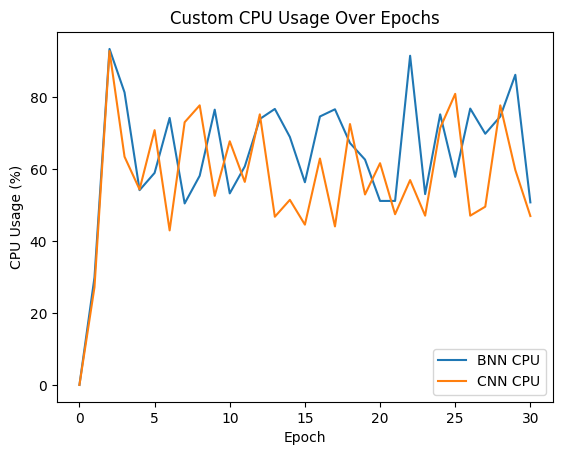

In [ ]:
# Comparison in CPU
import matplotlib.pyplot as plt

plt.plot(epochs_list, cpu_usage, label='BNN CPU')
plt.plot(epochs_list_custom, custom_cpu_usage , label='CNN CPU')
plt.xlabel('Epoch')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.title('Custom CPU Usage Over Epochs')
plt.show()

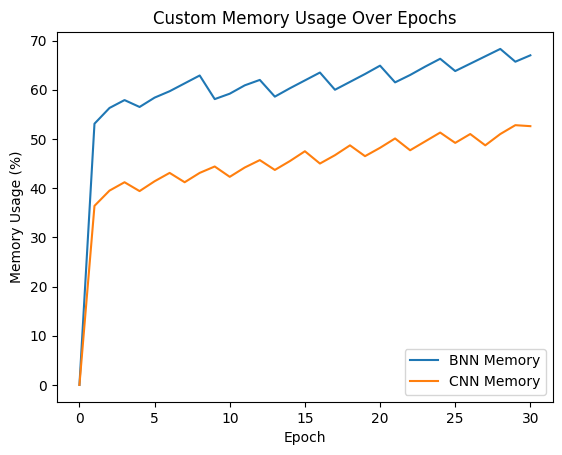

In [ ]:
# Comparison in Memory

plt.plot(epochs_list, memory_usage, label='BNN Memory')
plt.plot(epochs_list_custom, custom_memory_usage , label='CNN Memory')
plt.xlabel('Epoch')
plt.ylabel('Memory Usage (%)')
plt.legend()
plt.title('Custom Memory Usage Over Epochs')
plt.show()

In [ ]:
# END

END